
## Maleria Overview and Sample Report...

In [0]:
# The applied options are for CSV files. For other file types, these will be ignored.
file_location = "/FileStore/tables/merged_without_city_1.csv"
file_type = "csv"

df = spark.read.format(file_type) \
  .option("inferSchema", "true") \
  .option("header", "true") \
  .option("sep", ",") \
  .load(file_location)

# display(df)


In [0]:
# from pyspark.sql.types import StructType, StructField, StringType, IntegerType

# # Define the schema explicitly
# schema = StructType([
#     StructField("Country", StringType(), True),
#     StructField("Year", IntegerType(), True),
#     StructField("Healthcare_Access_Quality", IntegerType(), True)
# ])

# # Load the CSV file with the explicit schema
# df = spark.read.format("csv") \
#     .option("header", "true") \
#     .schema(schema) \
#     .load("/FileStore/tables/merged_without_city_1.csv")

# display(df)


In [0]:
# Create a view or table

temp_table_name = "merged_without_city_1_csv"

df.createOrReplaceTempView(temp_table_name)

In [0]:
# %sql

# /* Query the created temp table in a SQL cell */

# -- select * from `merged_without_city_1_csv`

In [0]:
# With this registered as a temp view, it will only be available to this particular notebook. If you'd like other users to be able to query this table, you can also create a table from the DataFrame.
# Once saved, this table will persist across cluster restarts as well as allow various users across different notebooks to query this data.
# To do so, choose your table name and uncomment the bottom line.

permanent_table_name = "merged_without_city_1_csv"

# df.write.format("parquet").saveAsTable(permanent_table_name)

In [0]:
df.show()

+-----------+----+-----------+---------------+-----------------+-------------+----------+-------+---+---------+--------+------+--------------+-----------------+-------------------------+--------+---------+---------+-------------+---------+------------------+------------------+
|    Country|Year|TPopulation|TPopulationMale|TPopulationFemale|PopGrowthRate|PopDensity| Births|ISO|      GDP|   cases|Deaths|Mortality_Rate|Malaria_incidence|Healthcare Access Quality|    Area| Latitude|Longitude|Hospital_beds|Continent|        avg_temp_c|  precipitation_mm|
+-----------+----+-----------+---------------+-----------------+-------------+----------+-------+---+---------+--------+------+--------------+-----------------+-------------------------+--------+---------+---------+-------------+---------+------------------+------------------+
|Afghanistan|2010|   28189672|       14240377|         13949295|        2.742|   43.4157|1147643|AFG| 569.2827| 69798.0| 165.0|          0.76|            13.42|      

+-----------+----+-----------+---------------+-----------------+-------------+----------+-------+---+---------+--------+------+--------------+-----------------+-------------------------+--------+---------+---------+-------------+---------+------------------+------------------+
|    Country|Year|TPopulation|TPopulationMale|TPopulationFemale|PopGrowthRate|PopDensity| Births|ISO|      GDP|   cases|Deaths|Mortality_Rate|Malaria_incidence|Healthcare Access Quality|    Area| Latitude|Longitude|Hospital_beds|Continent|        avg_temp_c|  precipitation_mm|
+-----------+----+-----------+---------------+-----------------+-------------+----------+-------+---+---------+--------+------+--------------+-----------------+-------------------------+--------+---------+---------+-------------+---------+------------------+------------------+
|Afghanistan|2010|   28189672|       14240377|         13949295|        2.742|   43.4157|1147643|AFG| 569.2827| 69798.0| 165.0|          0.76|            13.42|      

In [0]:
df.show(10)
df.printSchema()

+-----------+----+-----------+---------------+-----------------+-------------+----------+-------+---+---------+--------+------+--------------+-----------------+-------------------------+--------+--------+---------+-------------+---------+------------------+------------------+
|    Country|Year|TPopulation|TPopulationMale|TPopulationFemale|PopGrowthRate|PopDensity| Births|ISO|      GDP|   cases|Deaths|Mortality_Rate|Malaria_incidence|Healthcare Access Quality|    Area|Latitude|Longitude|Hospital_beds|Continent|        avg_temp_c|  precipitation_mm|
+-----------+----+-----------+---------------+-----------------+-------------+----------+-------+---+---------+--------+------+--------------+-----------------+-------------------------+--------+--------+---------+-------------+---------+------------------+------------------+
|Afghanistan|2010|   28189672|       14240377|         13949295|        2.742|   43.4157|1147643|AFG| 569.2827| 69798.0| 165.0|          0.76|            13.42|       34

In [0]:
df.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- TPopulation: integer (nullable = true)
 |-- TPopulationMale: integer (nullable = true)
 |-- TPopulationFemale: integer (nullable = true)
 |-- PopGrowthRate: double (nullable = true)
 |-- PopDensity: double (nullable = true)
 |-- Births: integer (nullable = true)
 |-- ISO: string (nullable = true)
 |-- GDP: double (nullable = true)
 |-- cases: double (nullable = true)
 |-- Deaths: double (nullable = true)
 |-- Mortality_Rate: double (nullable = true)
 |-- Malaria_incidence: double (nullable = true)
 |-- Healthcare Access Quality: double (nullable = true)
 |-- Area: double (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Hospital_beds: double (nullable = true)
 |-- Continent: string (nullable = true)
 |-- avg_temp_c: double (nullable = true)
 |-- precipitation_mm: double (nullable = true)



In [0]:
%fs
ls

path,name,size,modificationTime
dbfs:/FileStore/,FileStore/,0,0
dbfs:/databricks-datasets/,databricks-datasets/,0,0
dbfs:/databricks-results/,databricks-results/,0,0
dbfs:/delta/,delta/,0,0
dbfs:/user/,user/,0,0


In [0]:
# %sql
# SELECT * from merged_without_city_1_csv

In [0]:
bronze_path = "/delta/bronze/merged_without_city_1"


In [0]:
%fs
ls


path,name,size,modificationTime
dbfs:/FileStore/,FileStore/,0,0
dbfs:/databricks-datasets/,databricks-datasets/,0,0
dbfs:/databricks-results/,databricks-results/,0,0
dbfs:/delta/,delta/,0,0
dbfs:/user/,user/,0,0


In [0]:
file_list = dbutils.fs.ls("/FileStore/tables/")

for file in file_list:
    print(f"Path: {file.path}, Name: {file.name}")


Path: dbfs:/FileStore/tables/customer_data.csv, Name: customer_data.csv
Path: dbfs:/FileStore/tables/merged_without_city_1-1.csv, Name: merged_without_city_1-1.csv
Path: dbfs:/FileStore/tables/merged_without_city_1.csv, Name: merged_without_city_1.csv
Path: dbfs:/FileStore/tables/retail_sales_with_garbage.csv, Name: retail_sales_with_garbage.csv
Path: dbfs:/FileStore/tables/sales_report-1.csv, Name: sales_report-1.csv
Path: dbfs:/FileStore/tables/sales_report-2.csv, Name: sales_report-2.csv
Path: dbfs:/FileStore/tables/sales_report.csv, Name: sales_report.csv


In [0]:
df = spark.read.option("header", True).csv("dbfs:/FileStore/tables/merged_without_city_1.csv")

In [0]:
from pyspark.sql.functions import trim, lower, col, to_date

df_clean = df.fillna({
    "cases": 0,
    "Deaths": 0,
    "GDP": 0,
    "TPopulation": 0,
    "PopGrowthRate": 0,
    "PopDensity": 0,
    "Hospital_beds": 0,
    "Continent": "unknown",
    "avg_temp_c": 0,
    "precipitation_mm": 0
})
df_clean.show(5)
# display(df_clean)

+-----------+----+-----------+---------------+-----------------+-------------+----------+-------+---+---------+--------+------+--------------+-----------------+-------------------------+--------+--------+---------+-------------+---------+------------------+----------------+
|    Country|Year|TPopulation|TPopulationMale|TPopulationFemale|PopGrowthRate|PopDensity| Births|ISO|      GDP|   cases|Deaths|Mortality_Rate|Malaria_incidence|Healthcare Access Quality|    Area|Latitude|Longitude|Hospital_beds|Continent|        avg_temp_c|precipitation_mm|
+-----------+----+-----------+---------------+-----------------+-------------+----------+-------+---+---------+--------+------+--------------+-----------------+-------------------------+--------+--------+---------+-------------+---------+------------------+----------------+
|Afghanistan|2010|   28189672|       14240377|         13949295|        2.742|   43.4157|1147643|AFG| 569.2827| 69798.0| 165.0|          0.76|            13.42|       34.28571

In [0]:
df_clean_copy=df_clean
df_clean_processed= df_clean.dropDuplicates(["Year"])

# display(df_clean)

In [0]:

from pyspark.sql.functions import col

df_clean_processed = df_clean_processed.toDF(*[
    c.replace(" ", "_")
     .replace("(", "")
     .replace(")", "")
     .replace("=", "")
     .replace("\n", "")
     .replace("\t", "")
     .replace(",", "")
     .replace(";", "")
     .replace("{", "")
     .replace("}", "")
    for c in df_clean_processed.columns
])

df_clean_processed.write.format("delta").mode("overwrite").save("/delta/processed_malaria_data")

print(df_clean_processed.columns)


['Country', 'Year', 'TPopulation', 'TPopulationMale', 'TPopulationFemale', 'PopGrowthRate', 'PopDensity', 'Births', 'ISO', 'GDP', 'cases', 'Deaths', 'Mortality_Rate', 'Malaria_incidence', 'Healthcare_Access_Quality', 'Area', 'Latitude', 'Longitude', 'Hospital_beds', 'Continent', 'avg_temp_c', 'precipitation_mm']


In [0]:
%fs
ls dbfs:/delta/processed_malaria_data/

path,name,size,modificationTime
dbfs:/delta/processed_malaria_data/_delta_log/,_delta_log/,0,0
dbfs:/delta/processed_malaria_data/part-00000-029271ab-e0db-4a1e-b127-fd5573fc7e50-c000.snappy.parquet,part-00000-029271ab-e0db-4a1e-b127-fd5573fc7e50-c000.snappy.parquet,7869,1744707896000
dbfs:/delta/processed_malaria_data/part-00000-0d93f5e7-698d-4e21-b954-bd132561c948-c000.snappy.parquet,part-00000-0d93f5e7-698d-4e21-b954-bd132561c948-c000.snappy.parquet,7869,1744736299000
dbfs:/delta/processed_malaria_data/part-00000-5947853e-2db6-4547-9f32-db6d501e2619-c000.snappy.parquet,part-00000-5947853e-2db6-4547-9f32-db6d501e2619-c000.snappy.parquet,7869,1744774200000
dbfs:/delta/processed_malaria_data/part-00000-5a5960d7-731c-41c2-b7db-57aef52e1f87-c000.snappy.parquet,part-00000-5a5960d7-731c-41c2-b7db-57aef52e1f87-c000.snappy.parquet,7869,1744786344000
dbfs:/delta/processed_malaria_data/part-00000-6f692fd9-858d-424e-b705-dbce7af82aa9-c000.snappy.parquet,part-00000-6f692fd9-858d-424e-b705-dbce7af82aa9-c000.snappy.parquet,7869,1744719897000
dbfs:/delta/processed_malaria_data/part-00000-8133de51-375b-4c7b-8fae-18031dd996c6-c000.snappy.parquet,part-00000-8133de51-375b-4c7b-8fae-18031dd996c6-c000.snappy.parquet,7869,1745469988000
dbfs:/delta/processed_malaria_data/part-00000-a4559689-e926-4754-860e-733e785db84b-c000.snappy.parquet,part-00000-a4559689-e926-4754-860e-733e785db84b-c000.snappy.parquet,7869,1744738113000
dbfs:/delta/processed_malaria_data/part-00000-a4f44bcf-737d-473b-bf8f-e57046c0e983-c000.snappy.parquet,part-00000-a4f44bcf-737d-473b-bf8f-e57046c0e983-c000.snappy.parquet,7869,1744774483000
dbfs:/delta/processed_malaria_data/part-00000-d14ecc13-bed5-4b54-a3ca-a3ecca99fd84-c000.snappy.parquet,part-00000-d14ecc13-bed5-4b54-a3ca-a3ecca99fd84-c000.snappy.parquet,7869,1745469803000


Show from Delta Lake

In [0]:

df_delta = spark.read.format("delta").load("/delta/processed_malaria_data")
df_delta.show(5)


+-----------+----+-----------+---------------+-----------------+-------------+----------+-------+---+---------+--------+------+--------------+-----------------+-------------------------+--------+--------+---------+-------------+---------+------------------+----------------+
|    Country|Year|TPopulation|TPopulationMale|TPopulationFemale|PopGrowthRate|PopDensity| Births|ISO|      GDP|   cases|Deaths|Mortality_Rate|Malaria_incidence|Healthcare_Access_Quality|    Area|Latitude|Longitude|Hospital_beds|Continent|        avg_temp_c|precipitation_mm|
+-----------+----+-----------+---------------+-----------------+-------------+----------+-------+---+---------+--------+------+--------------+-----------------+-------------------------+--------+--------+---------+-------------+---------+------------------+----------------+
|Afghanistan|2010|   28189672|       14240377|         13949295|        2.742|   43.4157|1147643|AFG| 569.2827| 69798.0| 165.0|          0.76|            13.42|       34.28571

In [0]:
df_delta = spark.read.table("merged_without_city_1_csv")
# display(df_delta)



In [0]:
spark.sql("CREATE TABLE IF NOT EXISTS malaria_processed USING DELTA LOCATION '/delta/processed_malaria_data'")

Out[52]: DataFrame[]

In [0]:
df_clean_processed.describe().show()

+-------+-----------+-----------------+--------------------+--------------------+-----------------+------------------+------------------+------------------+----+-----------------+------------------+------------------+-------------------+-----------------+-------------------------+--------+-----------------+-----------------+-------------------+---------+------------------+-----------------+
|summary|    Country|             Year|         TPopulation|     TPopulationMale|TPopulationFemale|     PopGrowthRate|        PopDensity|            Births| ISO|              GDP|             cases|            Deaths|     Mortality_Rate|Malaria_incidence|Healthcare_Access_Quality|    Area|         Latitude|        Longitude|      Hospital_beds|Continent|        avg_temp_c| precipitation_mm|
+-------+-----------+-----------------+--------------------+--------------------+-----------------+------------------+------------------+------------------+----+-----------------+------------------+--------------

In [0]:
sparkDF = spark.read.table("merged_without_city_1_csv")
display(sparkDF)

Country,Year,TPopulation,TPopulationMale,TPopulationFemale,PopGrowthRate,PopDensity,Births,ISO,GDP,cases,Deaths,Mortality_Rate,Malaria_incidence,Healthcare Access Quality,Area,Latitude,Longitude,Hospital_beds,Continent,avg_temp_c,precipitation_mm
Afghanistan,2010,28189672,14240377,13949295,2.742,43.4157,1147643,AFG,569.2827,69798.0,165.0,0.76,13.42,34.285714285714285,652230.0,33.93911,67.709953,0.39,Asia,null,null
Afghanistan,2011,29249157,14780282,14468875,4.603,45.0475,1157518,AFG,551.001,77549.0,192.0,0.85,16.04,34.285714285714285,652230.0,33.93911,67.709953,0.39,Asia,null,null
Afghanistan,2012,30466479,15399106,15067373,3.574,46.9223,1217396,AFG,596.4428,54840.0,92.0,0.39,9.38,34.285714285714285,652230.0,33.93911,67.709953,0.39,Asia,null,null
Afghanistan,2013,31541209,15946572,15594636,3.363,48.5775,1248455,AFG,608.3867,52965.0,129.0,0.53,11.48,34.285714285714285,652230.0,33.93911,67.709953,0.39,Asia,20.762162162162163,null
Afghanistan,2014,32716210,16543889,16172321,3.941,50.3872,1274665,AFG,602.51697,106478.0,152.0,0.6,12.63,34.285714285714285,652230.0,33.93911,67.709953,0.39,Asia,16.353972602739727,6.91875
Afghanistan,2015,33753499,17071446,16682054,2.327,51.9848,1315633,AFG,592.47656,119859.0,174.0,0.67,14.13,34.285714285714285,652230.0,33.93911,67.709953,0.39,Asia,17.49945205479452,9.861290322580643
Afghanistan,2016,34636207,17520861,17115346,2.83,53.3442,1315746,AFG,590.42773,241233.0,351.0,1.31,27.42,34.285714285714285,652230.0,33.93911,67.709953,0.39,Asia,18.080054644808744,11.675
Afghanistan,2017,35643418,18028696,17614722,2.902,54.8955,1332116,AFG,588.9305,313086.0,378.0,1.38,29.03,34.285714285714285,652230.0,33.93911,67.709953,0.39,Asia,17.741643835616436,9.489285714285714
Afghanistan,2018,36686784,18549862,18136922,2.869,56.5024,1355895,AFG,578.9859,248689.0,292.0,1.03,22.37,34.285714285714285,652230.0,33.93911,67.709953,0.39,Asia,17.646428571428572,6.888
Afghanistan,2019,37769498,19090409,18679089,2.947,58.1699,1377704,AFG,584.3869,173860.0,170.0,0.58,14.18,34.285714285714285,652230.0,33.93911,67.709953,0.39,Asia,18.10438356164384,2.9276315789473686


Databricks visualization. Run in Databricks to view.

Databricks data profile. Run in Databricks to view.

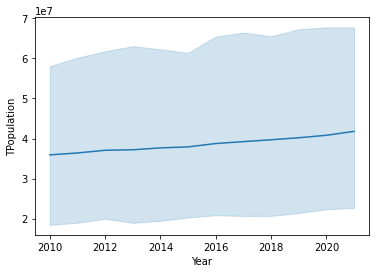

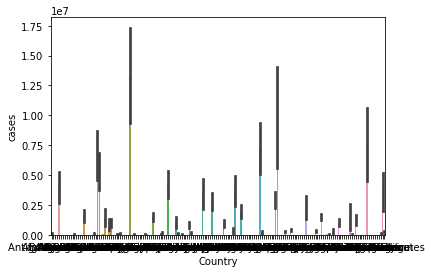

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

ploting_df=sparkDF.toPandas()
sns.lineplot(data=ploting_df, x="Year", y="TPopulation")
plt.show()

sns.barplot(data=ploting_df,x="Country",y="cases")
plt.show()

In [0]:
features = ['avg_temp_c', 'precipitation_mm', 'PopDensity','GDP', 'Hospital_beds']
target = 'Malaria_incidence'

In [0]:
from sklearn.model_selection import train_test_split
import numpy as np

pandas_df=sparkDF.toPandas()
# print(pandas_df.columns)

pandas_df = pandas_df.replace([np.inf, -np.inf], np.nan).dropna()

X = pandas_df[features]
y = pandas_df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

MLR r2 score: 0.23950456827735078
MLR Mean sqaured error: 108.71695840701244
MLR Mean abslute Error: 82.19500564983014


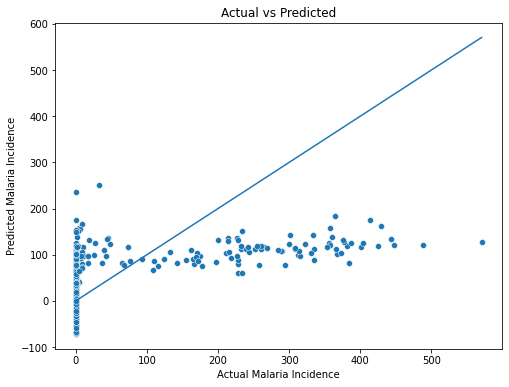

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred_mlr = mlr.predict(X_test)

print("MLR r2 score:", r2_score(y_test, y_pred_mlr))
print("MLR Mean sqaured error:", mean_squared_error(y_test, y_pred_mlr, squared=False))
print("MLR Mean abslute Error:", mean_absolute_error(y_test, y_pred_mlr))

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_mlr)
plt.xlabel("Actual Malaria Incidence")
plt.ylabel("Predicted Malaria Incidence")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.show()
